## Scikit-Plot
Scikit-Plot有四大模块，度量模块、估计器模块、聚类模块、降维模块
> #### Scikitplot.metrics(用于绘制机器学习的onfusion matrix, ROC AUC curves, precision-recall curves等曲线)
> > - plot_confusion_matrix：分类的混淆矩阵
> > - plot_precision_recall：分类的查准查全
> > - plot_roc：分类的 ROC 曲线
> > - plot_ks_statistic
> > - plot_silhouette：度量聚类好坏的轮廓系数
> > - plot_calibration_curve
> > - plot_cumulative_gain
> > - plot_lift_curve
> #### scikitplot.estimators(用于绘制各种算法)
> > - plot_learning_curve：学习曲线
> > - plot_feature_importances：特征重要性
> #### scikitplot.cluster(主要用于绘制聚类)
> > - plot_elbow_curve：决定簇个数的肘部曲线
> #### scikitplot.decomposition(主要用于绘制PCA降维)
> > - plot_pca_component_variance：可解释方差
> > - plot_pca_2d_projection：高维投影到二维

## 1. 调库

In [81]:
import scikitplot as skplt

import sklearn
from sklearn.datasets import load_digits, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import sys

import pandas as pd
import numpy as np

## 2. 加载数据集
### 2.1 手写数据集

In [82]:
digits = load_digits()
x_digits, y_digits = digits.data , digits.target
print('Digits Dataset Size:',x_digits.shape, y_digits.shape)
x_digits_train, x_digits_test, y_digits_train, y_digits_test = train_test_split(x_digits, y_digits, train_size=0.8, stratify=y_digits, random_state=1)
print('Digits Train/Test Sizes:', x_digits_train.shape, x_digits_test.shape, y_digits_train.shape, y_digits_test.shape)

Digits Dataset Size: (1797, 64) (1797,)
Digits Train/Test Sizes: (1437, 64) (360, 64) (1437,) (360,)


#### train_test_split(train_data, train_target, test_size=0.4, random_state=0, stratify=y_train)
> - train_data:所要划分的样本特征集
> - train_target：所要划分的样本结果
> - test_size：样本占比，如果是整数的话就是样本的数量
> - random_state：是随机数的种子。
> - 随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。
> > - stratify是为了保持split前类的分布。比如有100个数据，80个属于A类，20个属于B类。
> > 如果train_test_split(... test_size=0.25, stratify = y_all), 那么split之后数据如下： 
> > training: 75个数据，其中60个属于A类，15个属于B类。 
> > testing: 25个数据，其中20个属于A类，5个属于B类。 
> > 用了stratify参数，training集和testing集的类的比例是 A：B= 4：1，等同于split前的比例（80：20）。通常在这种类分布不平衡的情况下会用到stratify。
> > - 将stratify=X就是按照X中的比例分配 
> > - 将stratify=y就是按照y中的比例分配 

### 2.2 肿瘤数据集

In [83]:
cancer = load_breast_cancer()
x_cancer, y_cancer = cancer.data, cancer.target

print('Feature Names:',cancer.feature_names)
print('Cancer Datasets Size:', x_cancer.shape, y_cancer.shape)
x_cancer_train, x_cancer_test, y_cancer_train, y_cancer_test = train_test_split(x_cancer, y_cancer, train_size=0.8, stratify=y_cancer, random_state=1)
print('Digits Train/Test Sizes:', x_cancer_train.shape, x_cancer_test.shape, y_cancer_train.shape, y_cancer_test.shape)

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Cancer Datasets Size: (569, 30) (569,)
Digits Train/Test Sizes: (455, 30) (114, 30) (455,) (114,)


### 2.3 波斯顿房价数据集

In [84]:
boston = load_boston()
x_boston, y_boston = boston.data, boston.target

print('Boston Dataset Size:', x_boston.shape, y_boston.shape)

print('Boston Dataset Features:',boston.feature_names)
x_boston_train, x_boston_test, y_boston_train, y_boston_test = train_test_split(x_boston, y_boston, train_size=0.8, random_state=1)
print("Boston Train/Test Sizes : ", x_boston_train.shape, x_boston_test.shape, y_boston_train.shape, y_boston_test.shape)

Boston Dataset Size: (506, 13) (506,)
Boston Dataset Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston Train/Test Sizes :  (404, 13) (102, 13) (404,) (102,)


/Users/zhaofeier/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

## 3. 性能可视化
### 3.1 交叉验证绘制

/Users/zhaofeier/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhaofeier/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

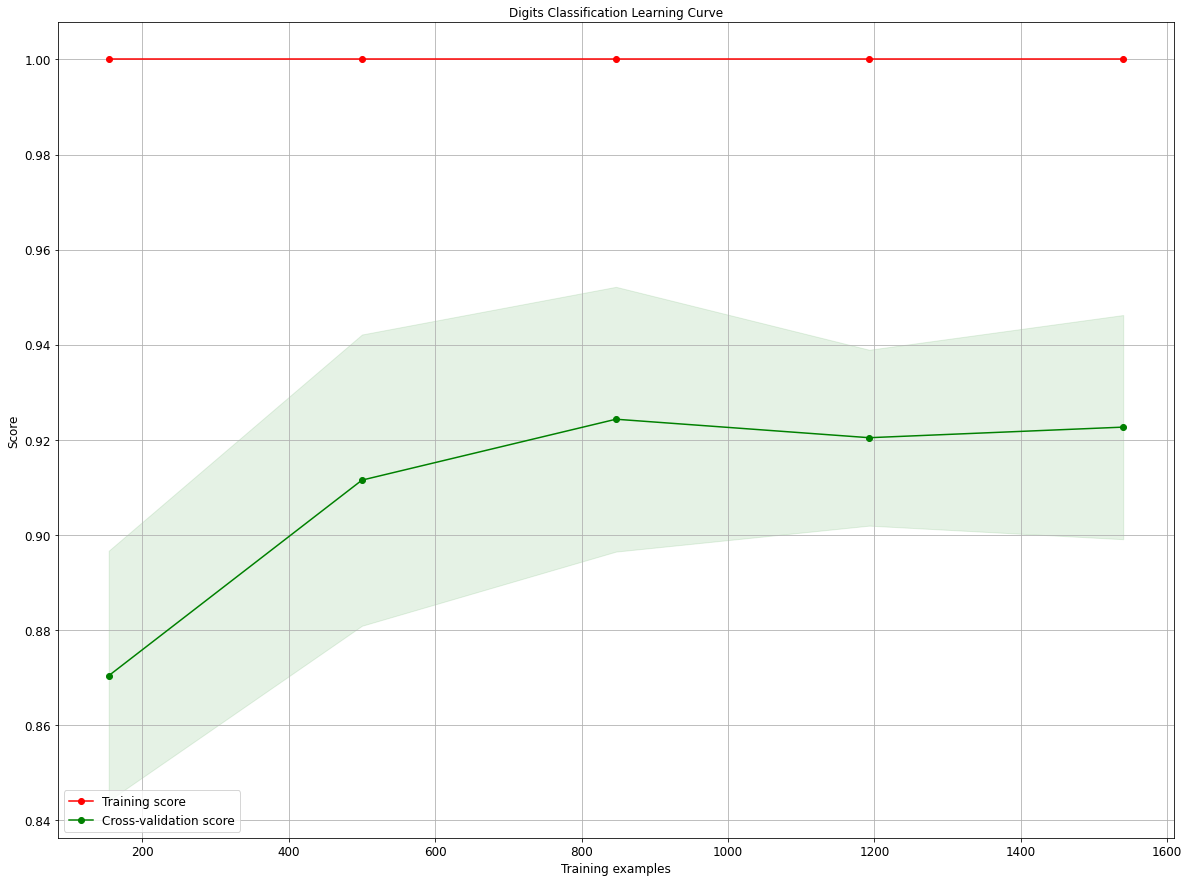

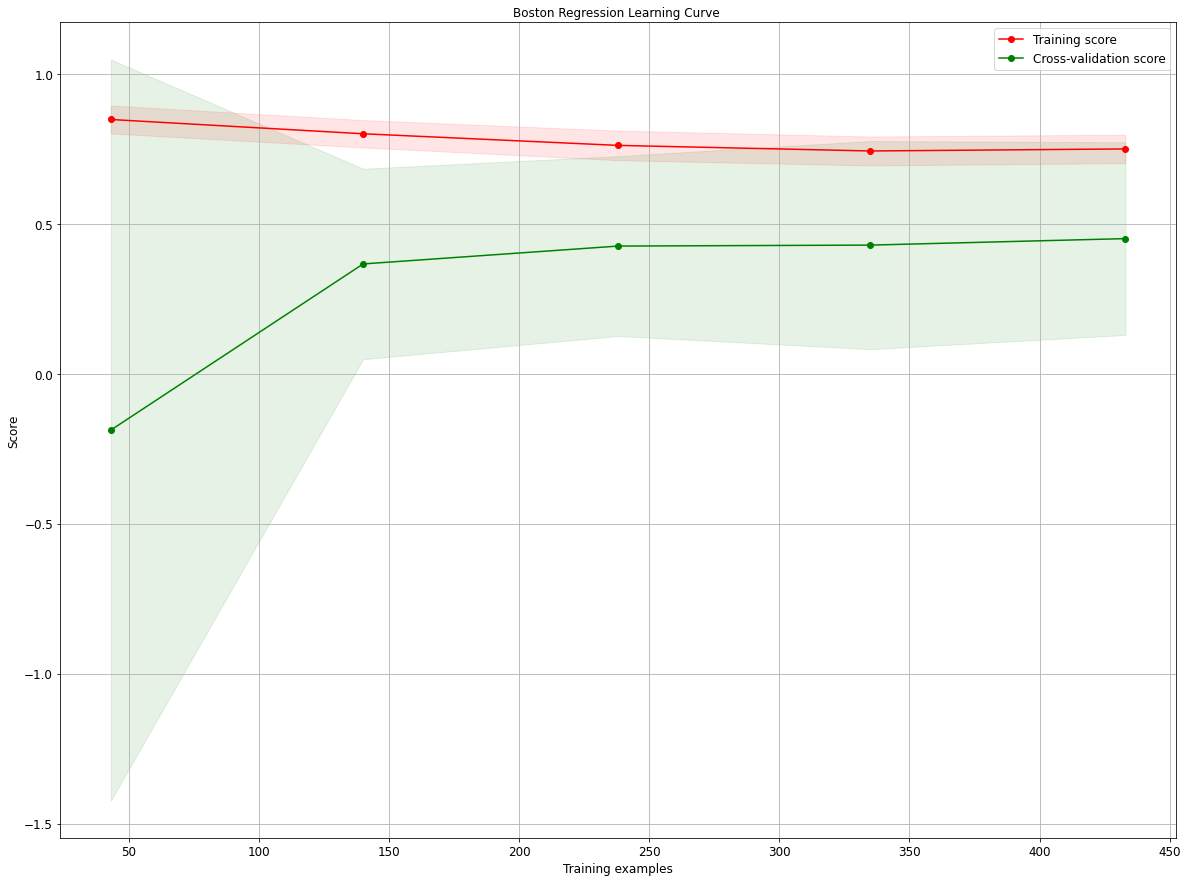

In [87]:
skplt.estimators.plot_learning_curve(LogisticRegression(), x_digits, y_digits,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(20,15), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve")
plt.show()
skplt.estimators.plot_learning_curve(LinearRegression(), x_boston, y_boston,
                                     cv=7, shuffle=True, scoring="r2", n_jobs=-1,
                                     figsize=(20,15), title_fontsize="large", text_fontsize="large",
                                     title="Boston Regression Learning Curve ");
plt.show()                                

```
plot_learning_curve(clf, X, y, title='Learning Curve', cv=None,     
                        shuffle=False, random_state=None,     
                        train_sizes=None, n_jobs=1, scoring=None,     
                        ax=None, figsize=None, title_fontsize="large",   
                        text_fontsize="medium")
```
- clf：实现“fit”和“predict”的分类器实例方法
- cv(int, cross-validation generator, iterable, optional): 确定用于拆分的交叉验证策略。
  - cv 的可能输入是：
        - 无，使用默认的 3 折交叉验证，
        - 整数，指定折叠次数。
        - 用作交叉验证生成器的对象。
        - 一个可迭代的产生训练/测试分割。
- shuffle(bool, optional):当do_cv设置为True时使用。确定是否在使用之前对训练数据进行混洗交叉验证。默认设置为True。
- random_state(int :class:`RandomState`)：伪随机数生成器用于随机抽样的状态。

### 3.2 重要性特征绘制

0.9159582027180388
0.9649122807017544


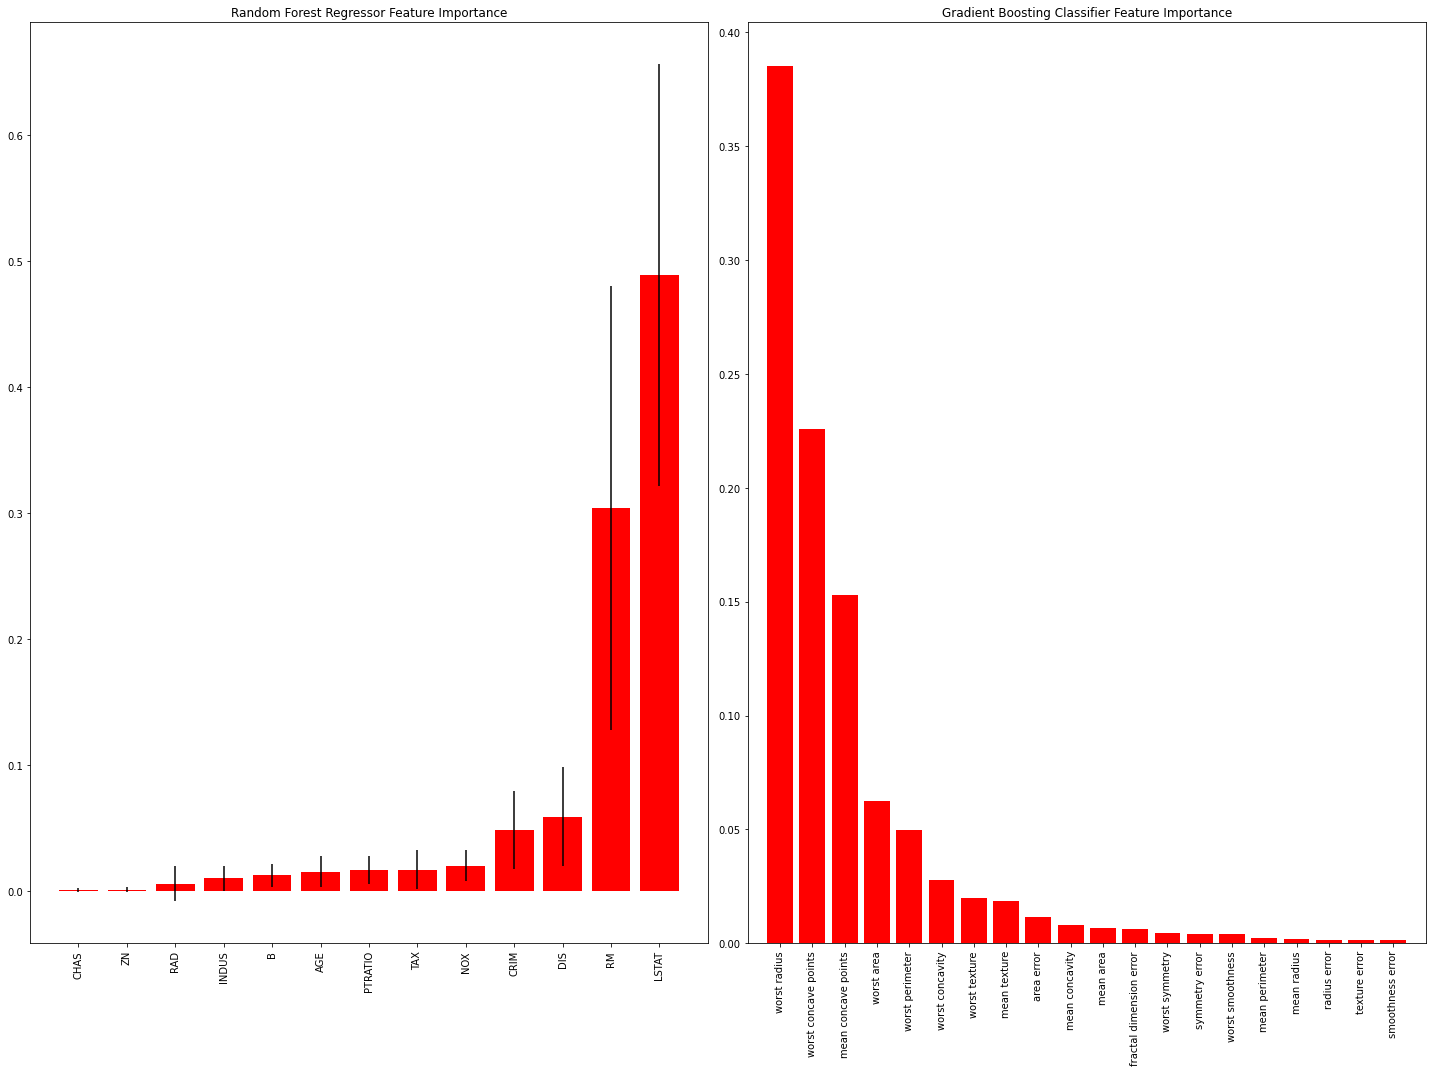

In [88]:
rfg = RandomForestRegressor()
rfg.fit(x_boston_train,y_boston_train)
print(rfg.score(x_boston_test,y_boston_test))

gb = GradientBoostingClassifier()
gb.fit(x_cancer_train,y_cancer_train)
print(gb.score(x_cancer_test,y_cancer_test))

fig=plt.figure(figsize=(20,15))

axl = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(rfg, feature_names=boston.feature_names,
                                          title='Random Forest Regressor Feature Importance',
                                          x_tick_rotation=90, order='ascending',
                                          ax=axl)
ax2 = fig.add_subplot(122)
skplt.estimators.plot_feature_importances(gb, feature_names=cancer.feature_names,
                                         title="Gradient Boosting Classifier Feature Importance",
                                         x_tick_rotation=90,
                                         ax=ax2);

plt.tight_layout()
plt.show()

## 4. 机器学习度量
### 4.1 混淆矩阵

/Users/zhaofeier/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


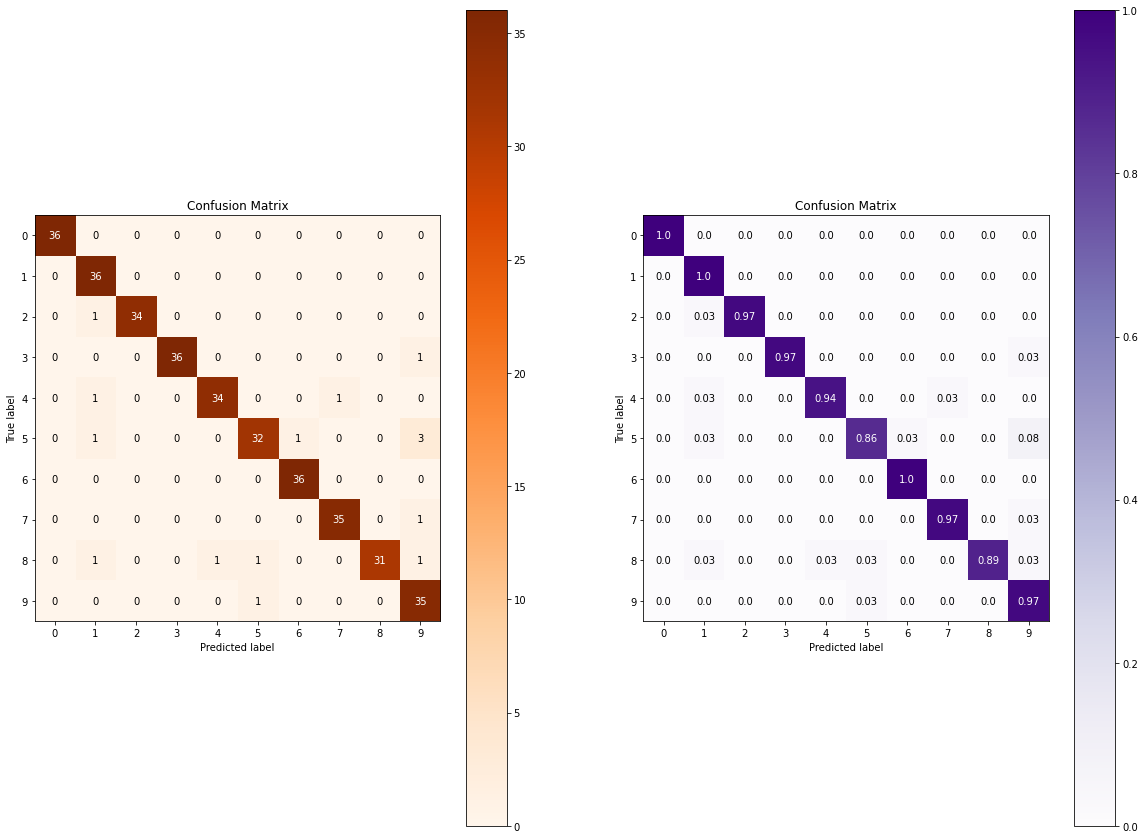

In [90]:
lr = LogisticRegression()
lr.fit(x_digits_train, y_digits_train)
lr.score(x_digits_test, y_digits_test)
y_test_pred = lr.predict(x_digits_test)

fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_digits_test, y_test_pred,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_digits_test, y_test_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);
plt.show()

### 4.2 ROC、AUC曲线

/Users/zhaofeier/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


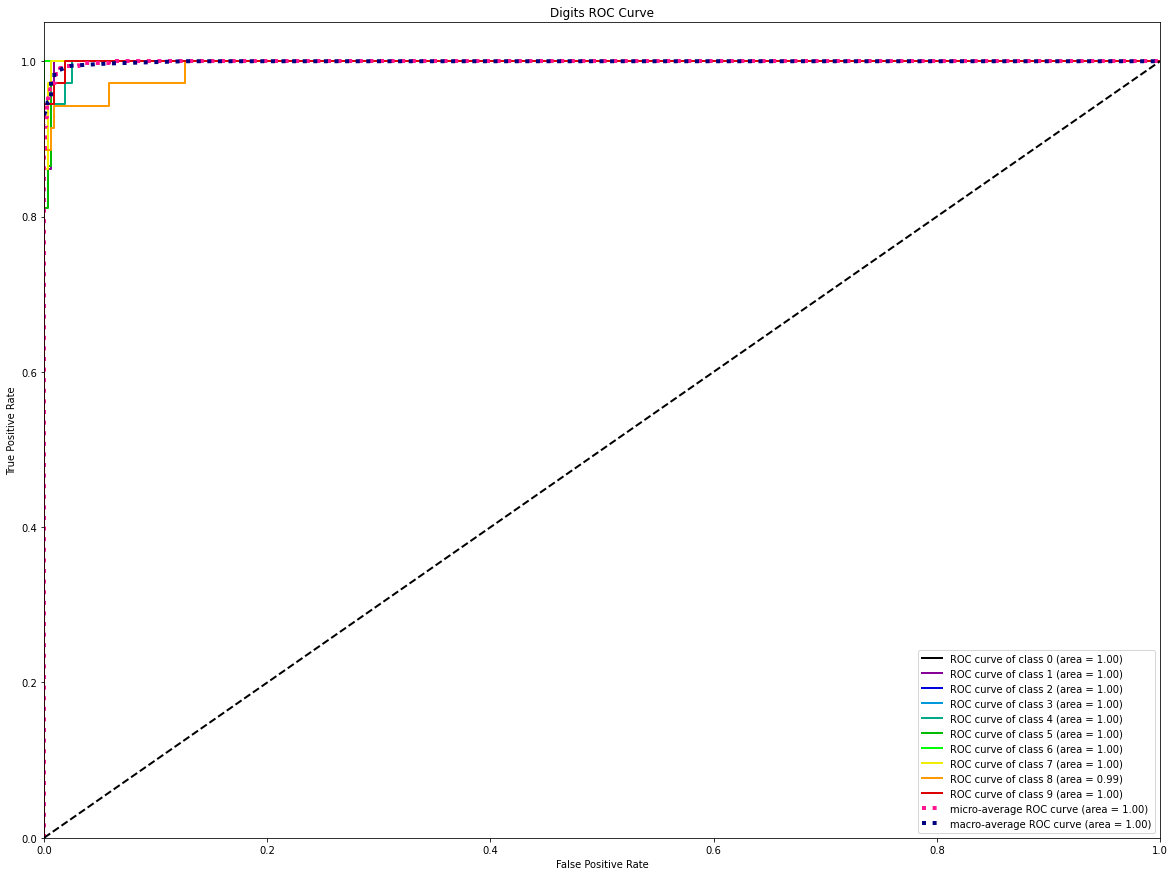

In [93]:
y_test_probs = lr.predict_proba(x_digits_test)

skplt.metrics.plot_roc_curve(y_digits_test, y_test_probs,
                       title="Digits ROC Curve", figsize=(20,15))
plt.show()

### 4.3 PR曲线

/Users/zhaofeier/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


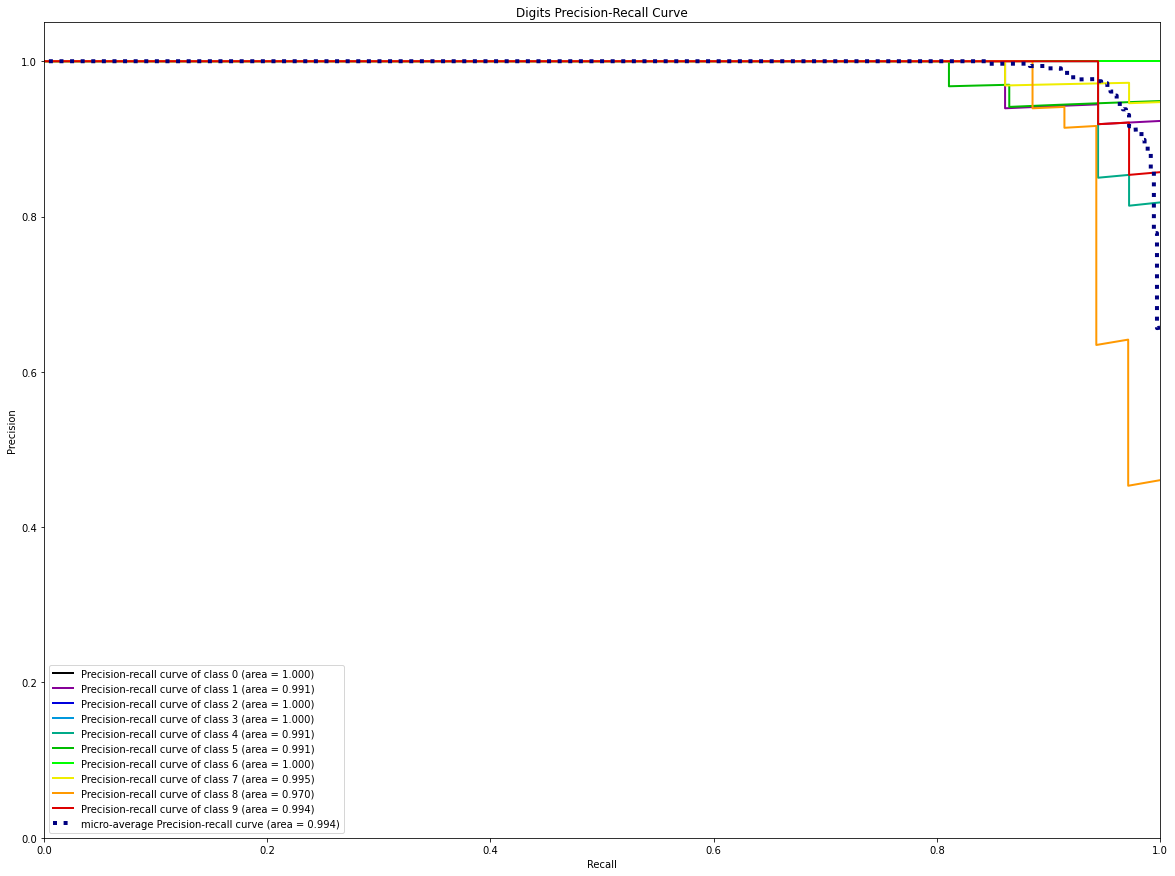

In [94]:
skplt.metrics.plot_precision_recall_curve(y_digits_test, y_test_probs,
                       title="Digits Precision-Recall Curve", figsize=(20,15))
plt.show()

### 4.4 轮廓分析

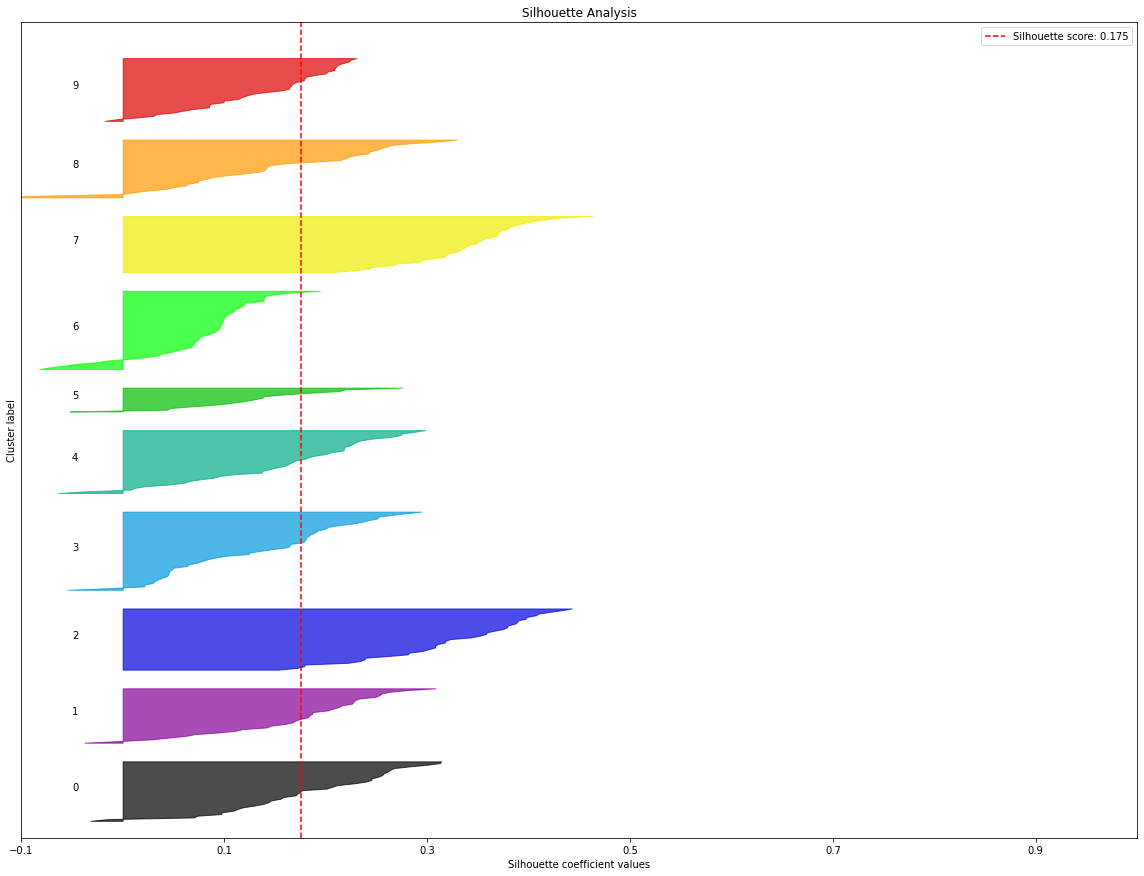

In [96]:
kmeans = KMeans(n_clusters=10, random_state=1)
kmeans.fit(x_digits_train, y_digits_train)
cluster_labels = kmeans.predict(x_digits_test)
skplt.metrics.plot_silhouette(x_digits_test, cluster_labels,
                              figsize=(20,15))
plt.show()

### 4.5 可靠性曲线

/Users/zhaofeier/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


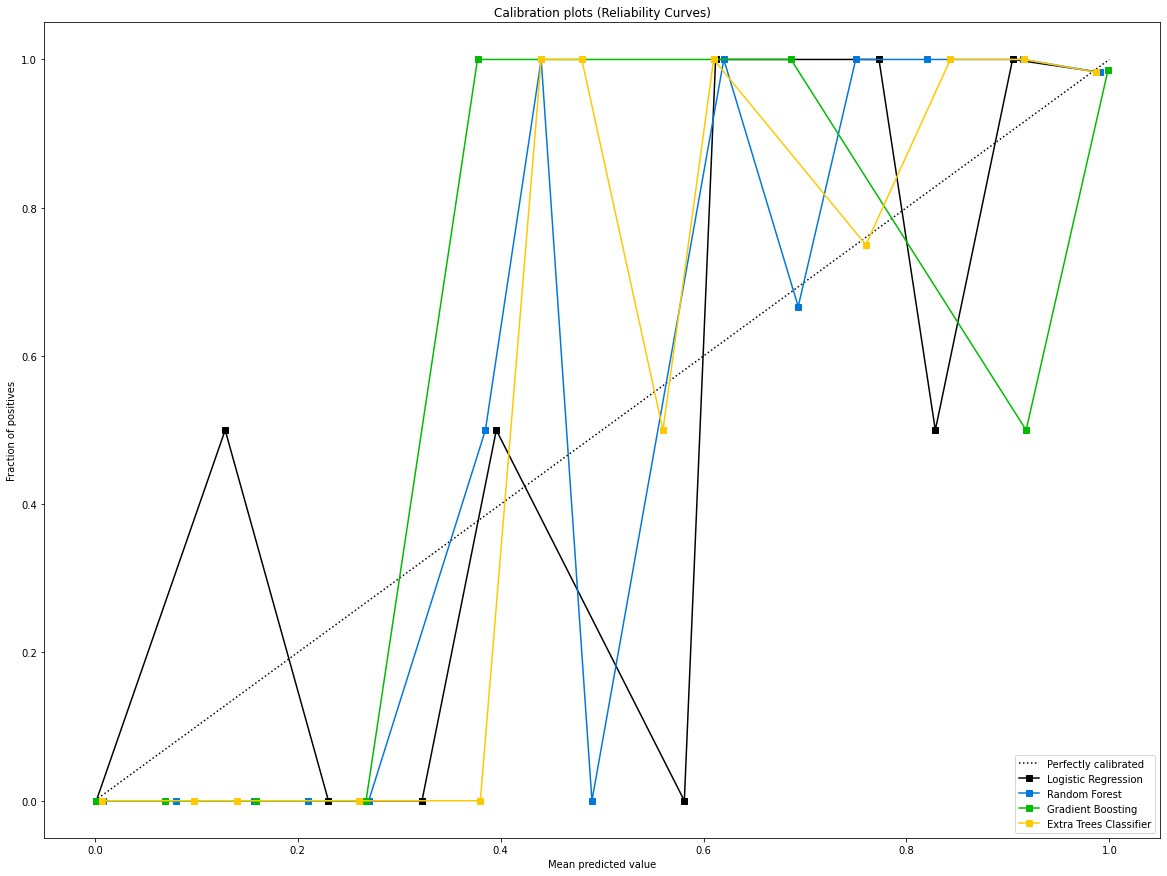

In [98]:
lr_probas = LogisticRegression().fit(x_cancer_train, y_cancer_train).predict_proba(x_cancer_test)
rf_probas = RandomForestClassifier().fit(x_cancer_train, y_cancer_train).predict_proba(x_cancer_test)
gb_probas = GradientBoostingClassifier().fit(x_cancer_train, y_cancer_train).predict_proba(x_cancer_test)
et_scores = ExtraTreesClassifier().fit(x_cancer_train, y_cancer_train).predict_proba(x_cancer_test)

probas_list = [lr_probas, rf_probas, gb_probas, et_scores]
clf_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Extra Trees Classifier']
skplt.metrics.plot_calibration_curve(y_cancer_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(20,15)
                                     )
plt.show()

### 4.6 KS检验

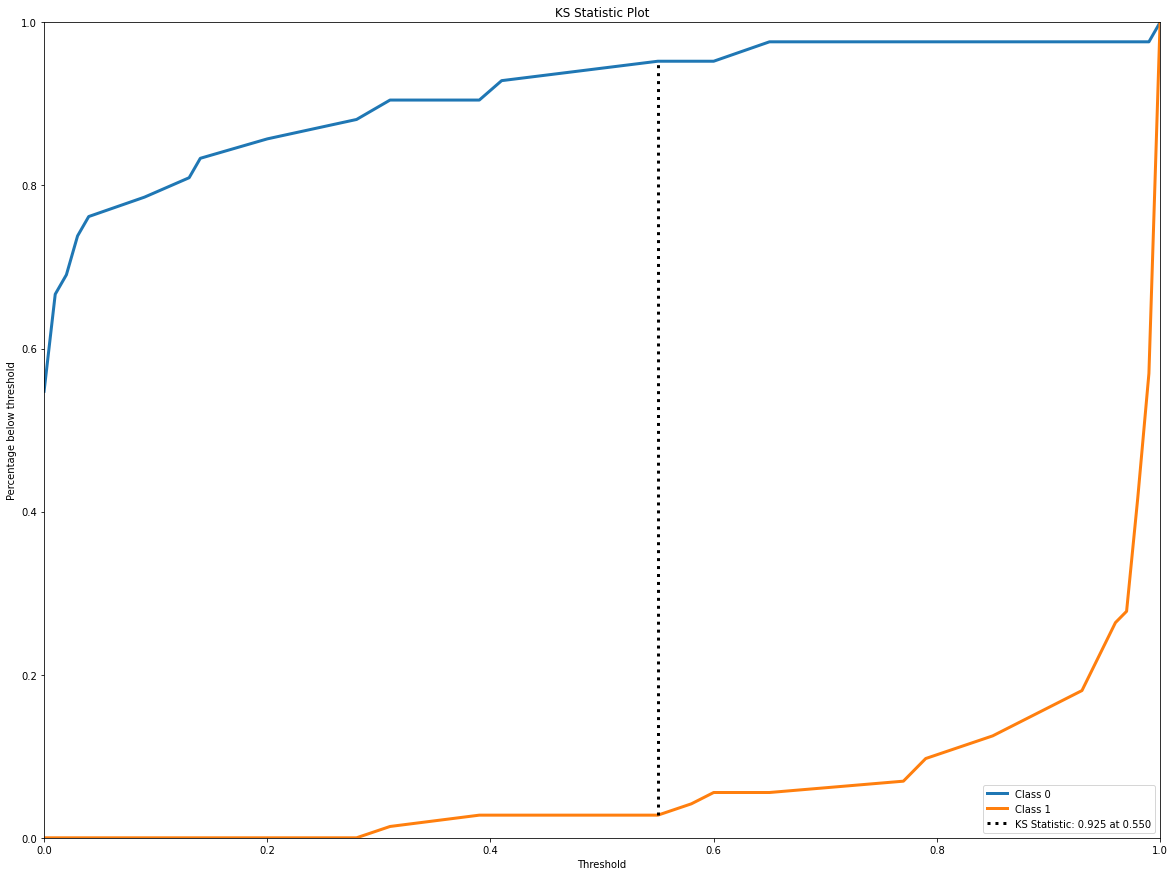

In [99]:
rf = RandomForestClassifier()
rf.fit(x_cancer_train, y_cancer_train)
y_cancer_probas = rf.predict_proba(x_cancer_test)

skplt.metrics.plot_ks_statistic(y_cancer_test, y_cancer_probas, figsize=(20,15))
plt.show()

### 4.7 累计收益曲线

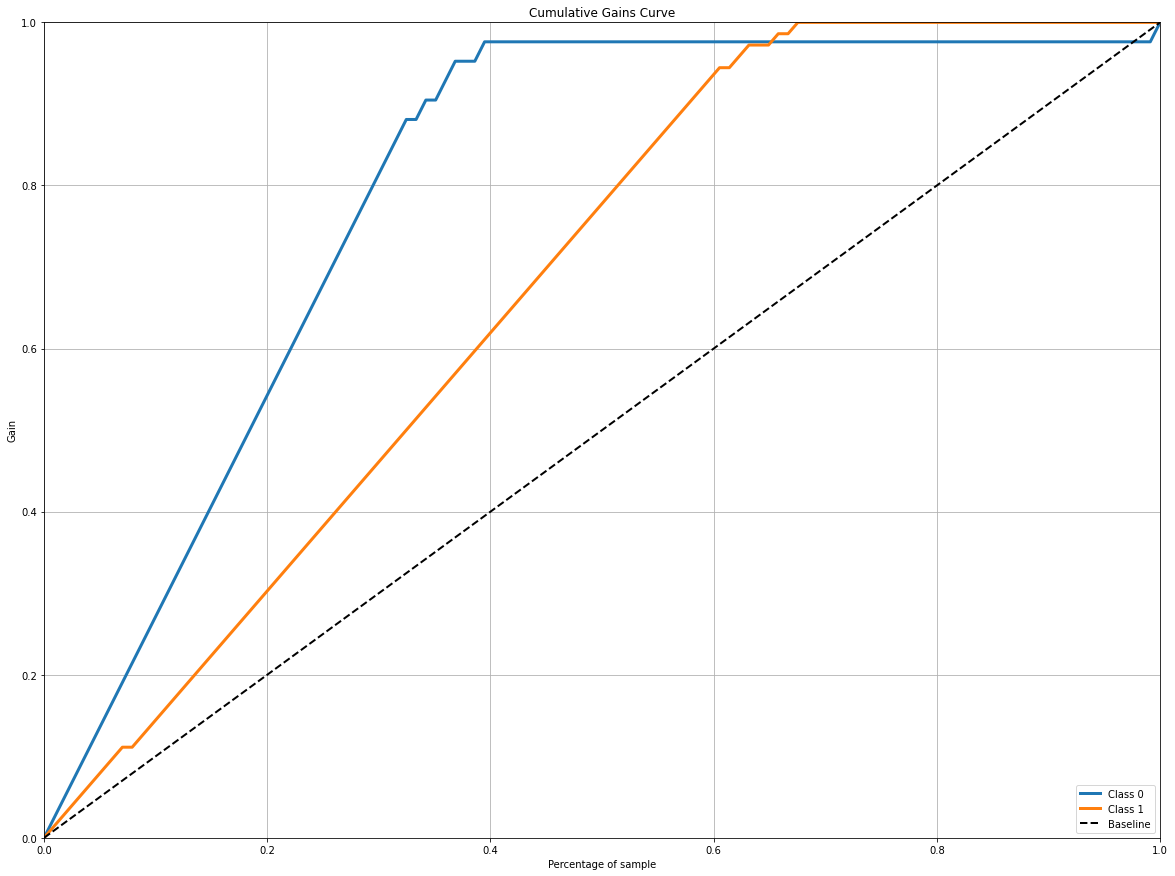

In [100]:
skplt.metrics.plot_cumulative_gain(y_cancer_test, y_cancer_probas, figsize=(20,15))
plt.show()

### 4.8 Lift曲线

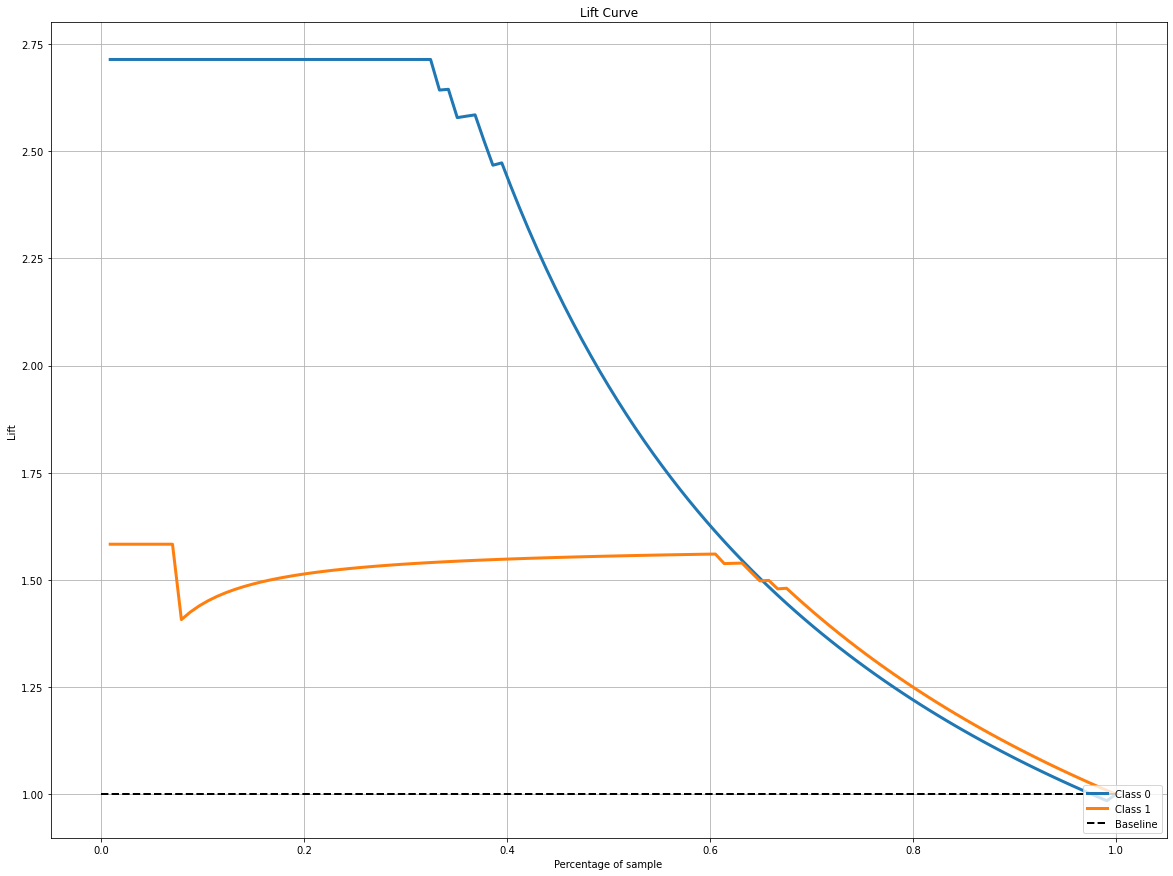

In [101]:
skplt.metrics.plot_lift_curve(y_cancer_test, y_cancer_probas, figsize=(20,15))
plt.show()

## 5. 聚类
### 5.1 肘部法则

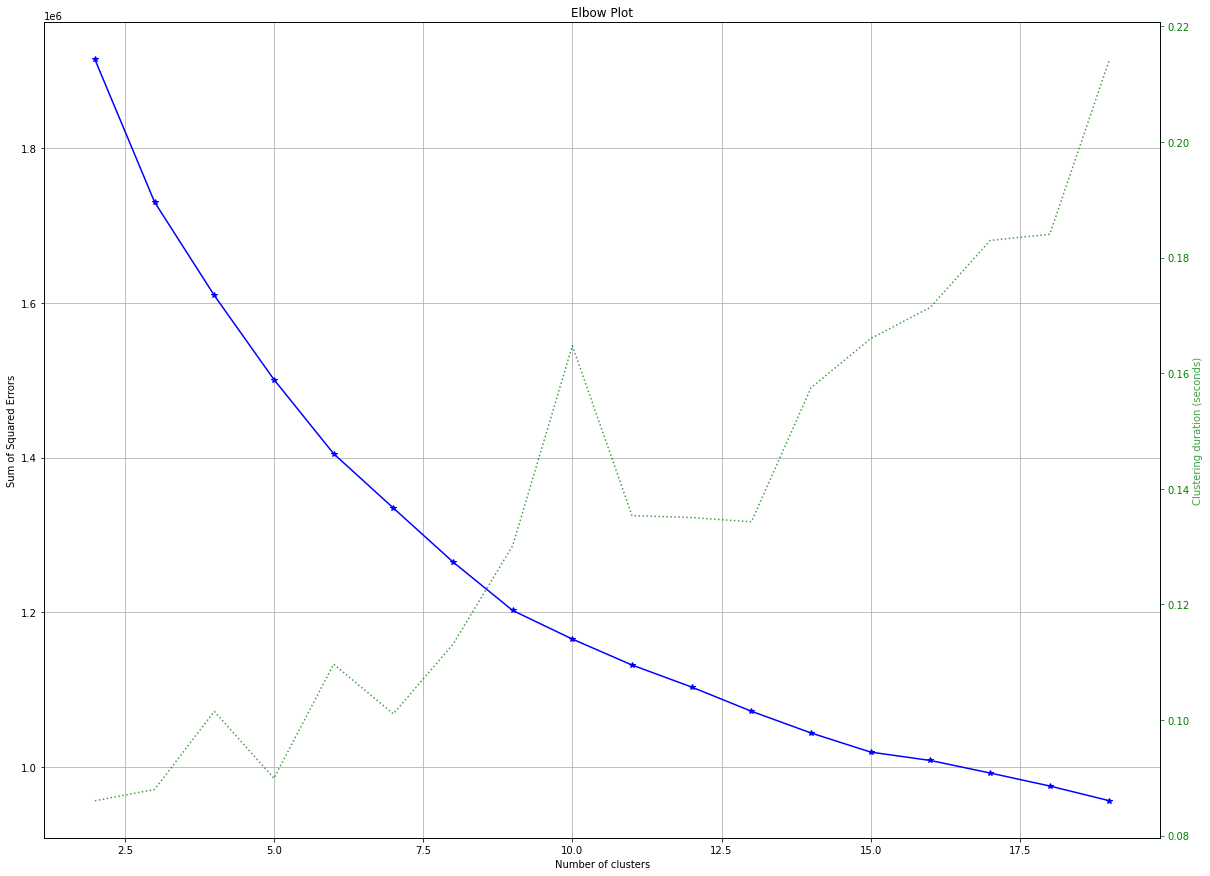

In [102]:
skplt.cluster.plot_elbow_curve(KMeans(random_state=1),
                               x_digits,
                               cluster_ranges=range(2, 20),
                               figsize=(20,15))
plt.show()

## 6. 降维
### 6.1 PCA

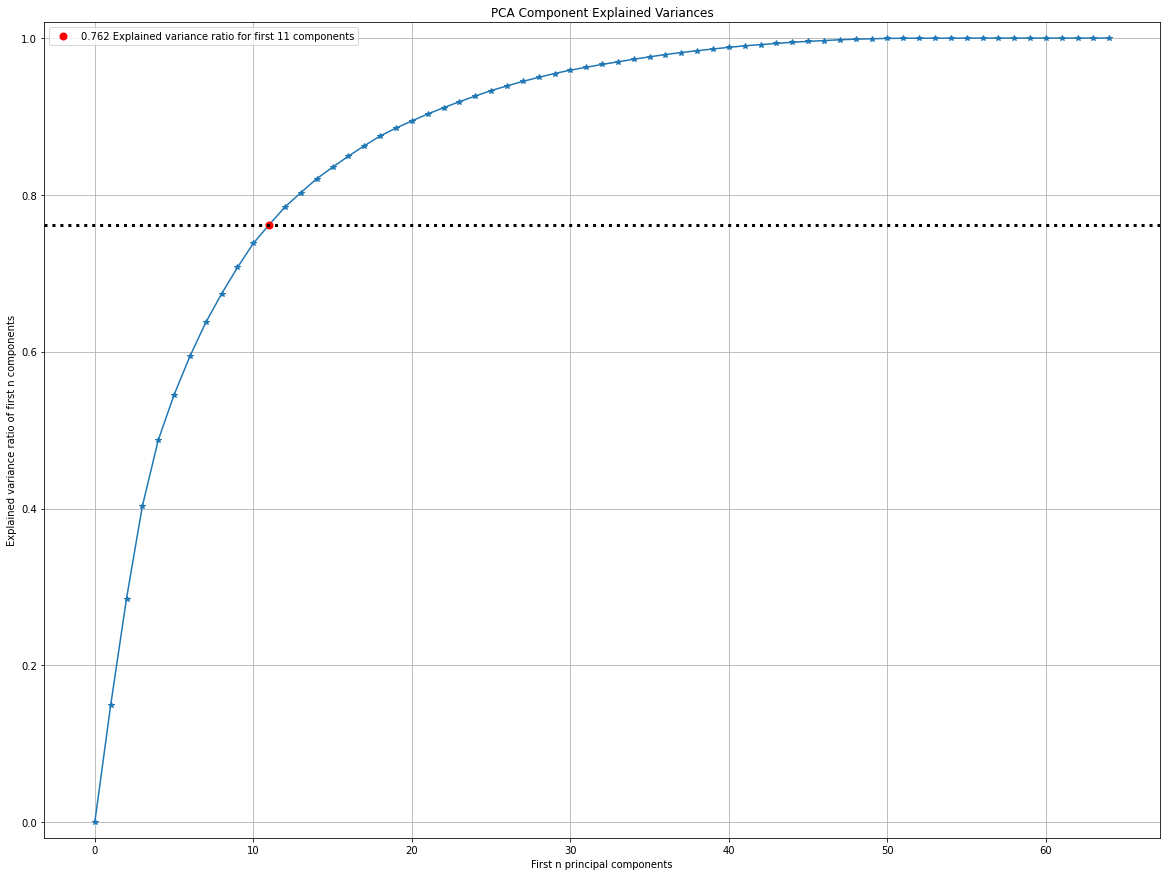

In [103]:
pca = PCA(random_state=1)
pca.fit(x_digits)

skplt.decomposition.plot_pca_component_variance(pca, figsize=(20,15))
plt.show()

### 6.2 2D投影

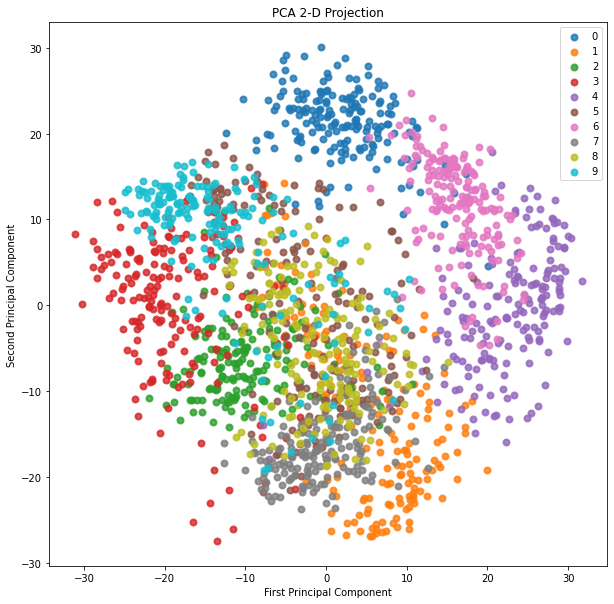

In [104]:
skplt.decomposition.plot_pca_2d_projection(pca, x_digits, y_digits,
                                           figsize=(10,10),
                                           cmap="tab10")
plt.show()